In [2]:
import torch
from torch import nn

import sys
import os
path = os.path.abspath("Helpers")
sys.path.append(path)
from helper_functions import plot_predictions, plot_decision_boundary, accuracy_fn

import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from timeit import default_timer as timer
from tqdm.auto import tqdm 

c:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [24]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"
if image_path.is_dir():
    print(f"{image_path} already exists")
else:
    print(f"{image_path} does not exist, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download the data
with open(data_path/"pizaa_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading the data")
    f.write(request.content)
    f.close()

with zipfile.ZipFile(data_path/"pizaa_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping data...")
    zip_ref.extractall(image_path)

data\pizza_steak_sushi already exists
Unzipping data...


In [25]:
import os

def walk_through_dir(dir_path):
    for dirpath, dirname, filenams in os.walk(dir_path):
        print(f"There are {len(dirname)} directories and {len(filenams)} images in {dirpath}")

walk_through_dir(image_path)

There are 2 directories and 0 images in data\pizza_steak_sushi
There are 3 directories and 0 images in data\pizza_steak_sushi\test
There are 0 directories and 25 images in data\pizza_steak_sushi\test\pizza
There are 0 directories and 19 images in data\pizza_steak_sushi\test\steak
There are 0 directories and 31 images in data\pizza_steak_sushi\test\sushi
There are 3 directories and 0 images in data\pizza_steak_sushi\train
There are 0 directories and 78 images in data\pizza_steak_sushi\train\pizza
There are 0 directories and 75 images in data\pizza_steak_sushi\train\steak
There are 0 directories and 72 images in data\pizza_steak_sushi\train\sushi


In [26]:
train_dir = image_path / "train"
test_dir = image_path / "test"

In [13]:
train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

In [28]:
import random
from PIL import Image

image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list

[WindowsPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/194643.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/195160.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2003290.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2019408.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2111981.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2124579.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2218680.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2236338.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2508636.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2871261.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/3092704.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/309892.jp

In [190]:

# random.seed(42)
random_image_path = random.choice(image_path_list)
# random_image_path
image_class = random_image_path.parent.stem
# print(image_class)
img = Image.open(random_image_path)
print(f"Random image path : {random_image_path}")
print(f"Image class : {image_class}")
print(f"Image height : {img.height}")
print(f"Image width : {img.width}")



Random image path : data\pizza_steak_sushi\train\sushi\497686.jpg
Image class : sushi
Image height : 512
Image width : 512


(512, 512, 3)


Text(0.5, 1.0, 'sushi')

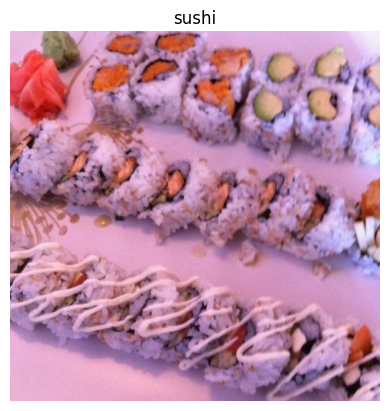

In [191]:
import numpy as np

img_array = np.array(img)
print(img_array.shape)
plt.imshow(img_array)
plt.axis(False)
plt.title(image_class)

In [192]:
print(img_array)

[[[245 193 231]
  [243 191 229]
  [241 189 227]
  ...
  [240 238 249]
  [239 237 248]
  [238 236 247]]

 [[242 190 228]
  [240 188 226]
  [238 186 224]
  ...
  [242 240 251]
  [242 240 251]
  [242 240 251]]

 [[240 188 226]
  [238 186 224]
  [236 184 222]
  ...
  [243 241 252]
  [244 242 253]
  [245 243 254]]

 ...

 [[233 177 212]
  [237 181 216]
  [234 178 213]
  ...
  [202 164 215]
  [206 167 220]
  [206 167 220]]

 [[230 174 209]
  [237 181 216]
  [234 178 213]
  ...
  [200 162 213]
  [201 162 215]
  [201 162 215]]

 [[227 171 206]
  [237 181 216]
  [235 179 214]
  ...
  [203 165 216]
  [205 166 219]
  [205 166 219]]]


Transforming Data

In [228]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

tImg = data_transform(img)





(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512>,
 tensor([[[0.9333, 0.9216, 0.9176,  ..., 0.9529, 0.9529, 0.9490],
          [0.9255, 0.9176, 0.9176,  ..., 0.9412, 0.9490, 0.9451],
          [0.9176, 0.9176, 0.9176,  ..., 0.9216, 0.9373, 0.9373],
          ...,
          [0.9137, 0.9176, 0.9137,  ..., 0.8078, 0.8118, 0.7333],
          [0.9176, 0.9176, 0.9137,  ..., 0.8824, 0.8235, 0.7686],
          [0.9176, 0.9216, 0.9176,  ..., 0.9020, 0.8471, 0.7373]],
 
         [[0.7333, 0.7333, 0.7333,  ..., 0.9176, 0.9333, 0.9373],
          [0.7255, 0.7294, 0.7333,  ..., 0.8902, 0.9176, 0.9255],
          [0.7216, 0.7255, 0.7333,  ..., 0.8549, 0.8902, 0.9059],
          ...,
          [0.6980, 0.6980, 0.6863,  ..., 0.6353, 0.6510, 0.6000],
          [0.6980, 0.7020, 0.6980,  ..., 0.6980, 0.6588, 0.6275],
          [0.7020, 0.7059, 0.7020,  ..., 0.7373, 0.7020, 0.5922]],
 
         [[0.8784, 0.8784, 0.8784,  ..., 0.9804, 0.9843, 0.9843],
          [0.8745, 0.8706, 0.8784,  ...,

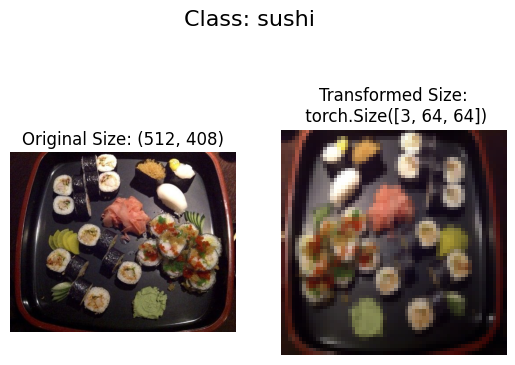

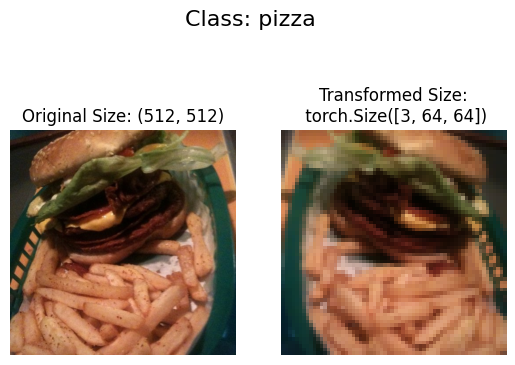

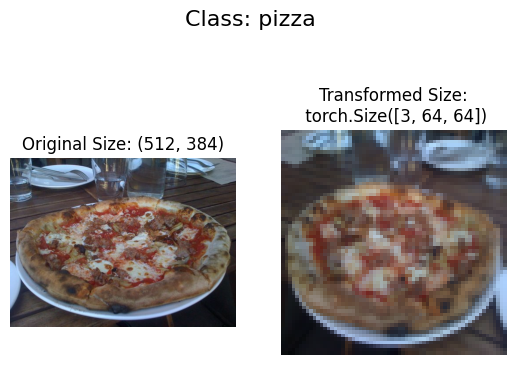

In [240]:
def plot_transformed_images(image_paths, transform, n = 3, seed = 42):
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k = n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows = 1, ncols = 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original Size: {f.size}")
            ax[0].axis(False)

            transformed_image = transform(f)
            ax[1].imshow(transformed_image.permute(1, 2, 0))
            ax[1].set_title(f"Transformed Size:\n {transformed_image.shape}")
            ax[1].axis(False)

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize = 16)
plot_transformed_images(image_paths=image_path_list, transform=data_transform)


In [241]:
train_data = datasets.ImageFolder(root = train_dir, transform = data_transform, target_transform=None)
test_data = datasets.ImageFolder(root = test_dir, transform = data_transform, target_transform=None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

(-0.5, 63.5, 63.5, -0.5)

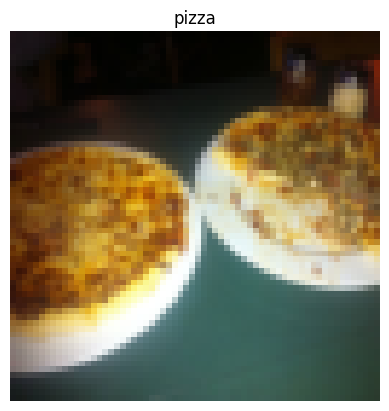

In [269]:
class_names = train_data.classes
class_dict = train_data.class_to_idx
class_dict
len(train_data.samples), len(train_data.targets)
img, label = train_data[0][0], train_data[0][1]
plt.imshow(img.permute(1, 2, 0))
plt.title(class_names[label])
plt.axis(False)

In [273]:
BATCH_SIZE = 16
train_dataloader = DataLoader(dataset = train_data,
                               batch_size=BATCH_SIZE,
                               shuffle=True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE, 
                             shuffle = False)